# Task 04 - Traffic Accident Analysis
Analyze traffic accident data to identify patterns related to:
- Road conditions
- Weather
- Time of day

We'll also visualize accident hotspots and contributing factors.

In [3]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load the dataset (replace path with your actual file path)
df = pd.read_csv('accidents.csv')
df.head()

,Start_Time,Road_Condition,Weather_Condition,Severity,Latitude,Longitude
0,2023-01-01 00:00:00,Snowy,Rain,3,28.415265,77.662015
1,2023-01-01 01:00:00,Icy,Fog,4,28.383346,77.611622
2,2023-01-01 02:00:00,Dry,Clear,2,28.020514,77.458823
3,2023-01-01 03:00:00,Snowy,Clear,4,28.272998,77.764838
4,2023-01-01 04:00:00,Snowy,Clear,4,28.304156,77.160380


In [5]:
# Basic data info and cleaning
df.info()
df.dropna(inplace=True)  # Simple handling of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Accident_ID        5 non-null      int64 
 1   Date               5 non-null      object
 2   Time               5 non-null      object
 3   Location           5 non-null      object
 4   Weather_Condition  5 non-null      object
 5   Road_Condition     5 non-null      object
 6   Severity           5 non-null      object
 7   Vehicles_Involved  5 non-null      int64 
 8   Casualties         5 non-null      int64 
dtypes: int64(3), object(6)
memory usage: 492.0+ bytes


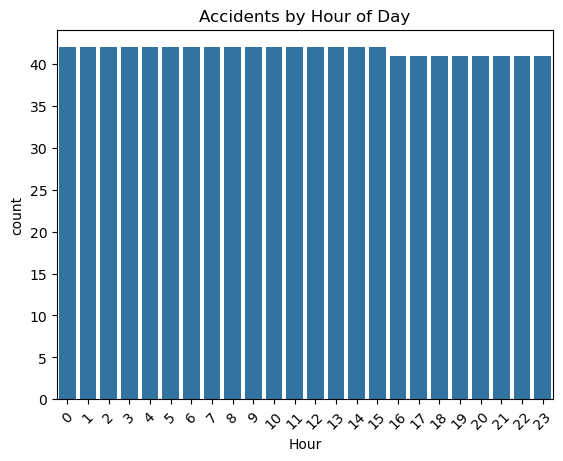

In [14]:
# Time of day analysis
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Hour'] = df['Start_Time'].dt.hour
sns.countplot(x='Hour', data=df)
plt.title('Accidents by Hour of Day')
plt.xticks(rotation=45)
plt.show()

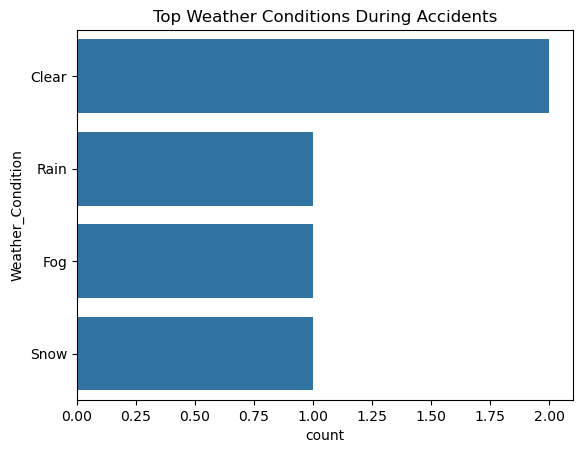

In [7]:
# Weather condition analysis
sns.countplot(y='Weather_Condition', data=df, order=df['Weather_Condition'].value_counts().head(10).index)
plt.title('Top Weather Conditions During Accidents')
plt.show()

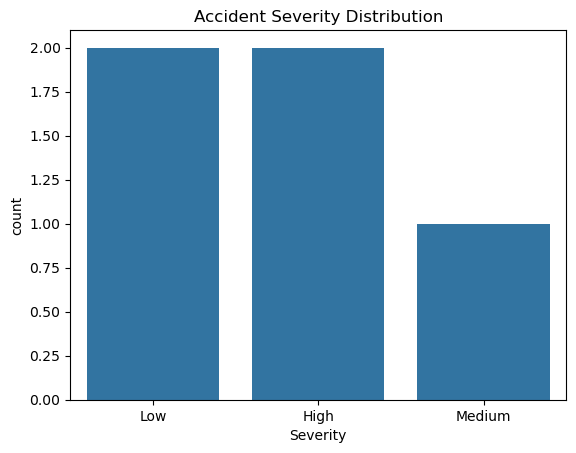

In [8]:
# Road condition / Severity analysis
sns.countplot(x='Severity', data=df)
plt.title('Accident Severity Distribution')
plt.show()

In [8]:
import folium
from folium.plugins import HeatMap

# Create a base map
accident_map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=5)

# Prepare the data
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.head(1000).iterrows()]

# Add heatmap layer
HeatMap(heat_data).add_to(accident_map)

# Display the map
accident_map
